_Control

In [12]:
%reset -f

In [26]:
import os
import numpy as np
import sympy as sp
import matplotlib as mpl
import pandas as pd
import jax
import jax.numpy as jnp

dspath="./datasets"

_Notes

Create Window

In [ ]:
import tkinter as tk

# Create the main window (root window)
root = tk.Tk()

# Set the title of the window
root.title("My First Window")

# Set the dimensions of the window (width x height)
root.geometry("400x300")

# Optional: Add a label to the window
label = tk.Label(root, text="Hello, Tkinter!", font=("Arial", 16))
label.pack(pady=50)  # Adds padding around the label

# Run the application (start the Tkinter event loop)
root.mainloop()

Keras Embedding

In [ ]:
import keras
from keras import ops

class TokenAndPositionEmbedding(keras.Layer):
    def __init__(self, max_length, vocab_size, embed_dim):
        super().__init__()
        self.token_embed = self.add_weight(
            shape=(vocab_size, embed_dim),
            initializer="random_uniform",
            trainable=True,
        )
        self.position_embed = self.add_weight(
            shape=(max_length, embed_dim),
            initializer="random_uniform",
            trainable=True,
        )

    def call(self, token_ids):
        # Embed positions
        length = token_ids.shape[-1]
        positions = ops.arange(0, length, dtype="int32")
        positions_vectors = ops.take(self.position_embed, positions, axis=0)
        # Embed tokens
        token_ids = ops.cast(token_ids, dtype="int32")
        token_vectors = ops.take(self.token_embed, token_ids, axis=0)
        # Sum both
        embed = token_vectors + positions_vectors
        # Normalize embeddings
        power_sum = ops.sum(ops.square(embed), axis=-1, keepdims=True)
        return embed / ops.sqrt(ops.maximum(power_sum, 1e-7))
    
abc=TokenAndPositionEmbedding(10000,20000, 512)
# print(abc.position_embed[1])
print(ops.sum(ops.square(abc.position_embed[1])))

A=ops.zeros(2)
print(A)



Pandas DataFrame

In [ ]:
import pandas as pd

# Sample DataFrame
data = {'col1': [1, 2, 3, 4, 5], 'col2': ['a', 'b', 'c', 'd', 'e']}
df = pd.DataFrame(data)

# Create a boolean mask for rows where 'col1' is greater than 2
mask = df['col1'] > 2

# Apply the mask to filter the DataFrame
filtered_df = df[mask]

# Display the filtered DataFrame
print(filtered_df)

torch.nn SimpleCNN MNIST

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device ="cpu"

# 1. Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Training and test datasets
train_dataset = torchvision.datasets.MNIST('./datasets', train=True,transform=transform)
test_dataset = torchvision.datasets.MNIST('./datasets', train=False,transform=transform)

# DataLoader for training and test sets
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# 2. Define the Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 128)  # Input layer (28x28 pixels)
        self.layer2 = nn.Linear(128, 64)       # Hidden layer
        self.output = nn.Linear(64, 10)        # Output layer (10 classes)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image into a 1D tensor
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output(x)
        return x

# Instantiate the model, define loss function and optimizer
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Training Loop
def train_model(model, train_loader, criterion, optimizer, device, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

# 4. Evaluation on Test Data
def evaluate_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test set: {100 * correct / total:.2f}%')

# 5. Run Training and Evaluation
train_model(model, train_loader, criterion, optimizer, device, epochs=5)
evaluate_model(model, test_loader, device)

Epoch [1/5], Loss: 0.3977
Epoch [2/5], Loss: 0.1894
Epoch [3/5], Loss: 0.1408
Epoch [4/5], Loss: 0.1135
Epoch [5/5], Loss: 0.0985
Accuracy of the model on the test set: 96.84%


matplotlib

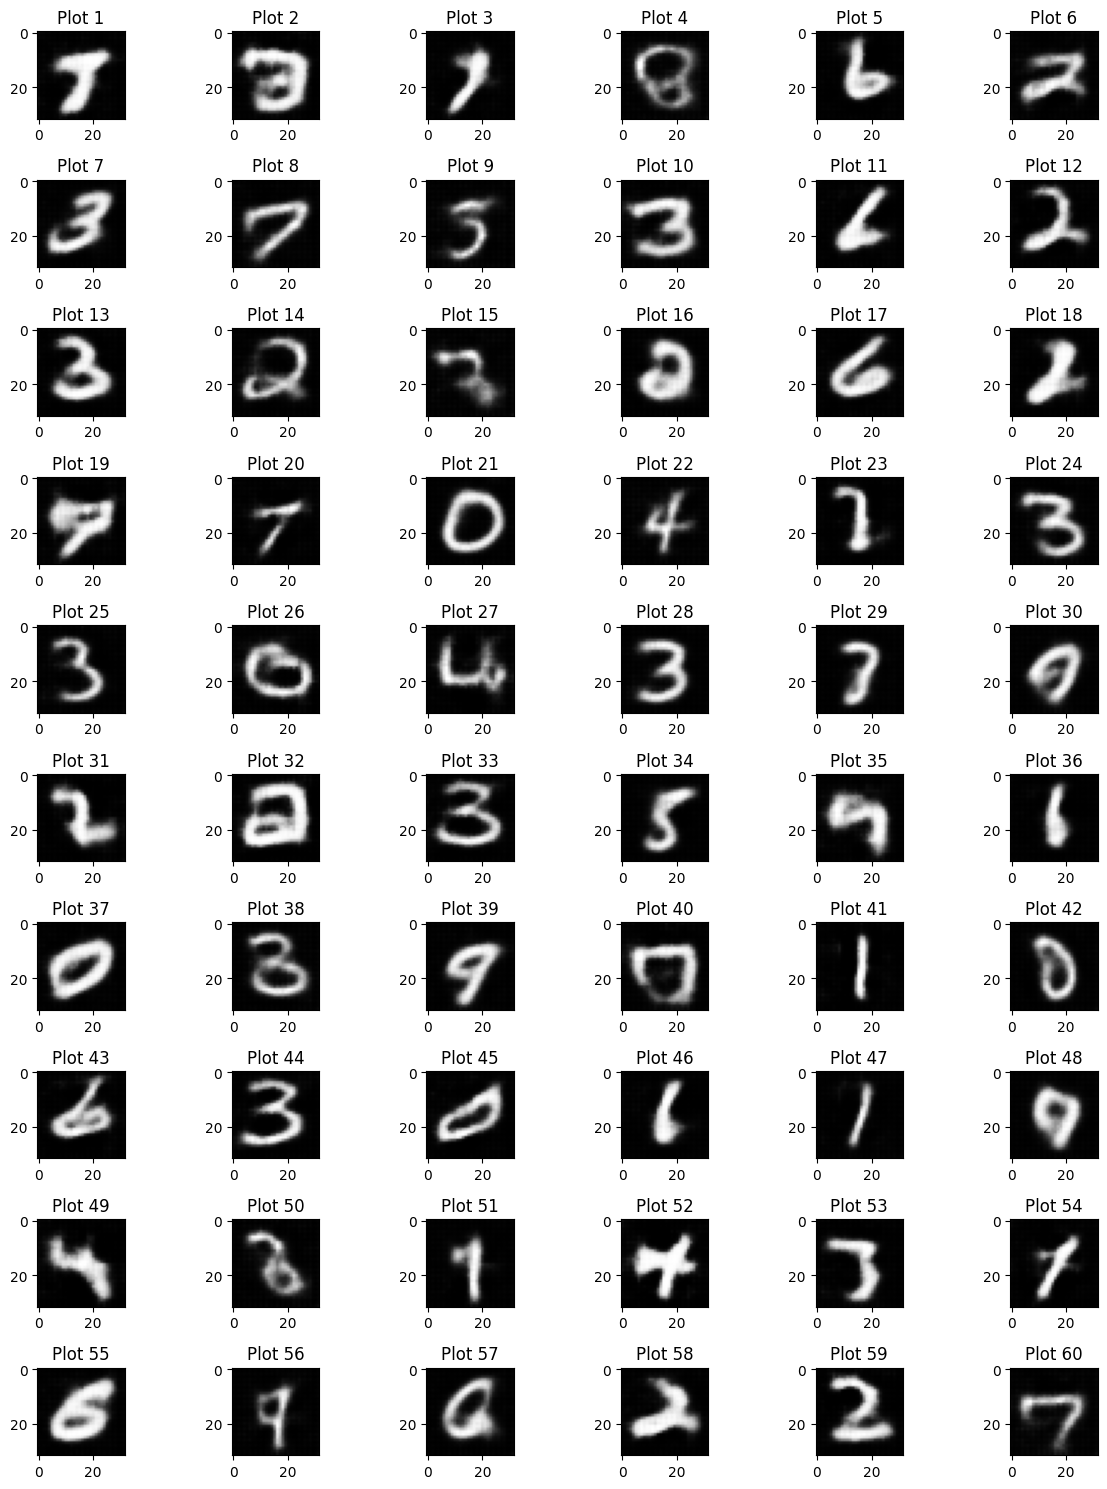

: 

In [36]:
import matplotlib.pyplot as plt
import numpy as np

"""
for i in range(decoded.shape[0]):

    array=decoded[i,0,:,:,0]
    
    # Plot the array as a grayscale image
    plt.imshow(array, cmap='gray')

    plt.colorbar()  # Add a color bar to the side for reference
    plt.title('Grayscale Image of 128x128 Array')
    plt.show()
"""

fig, axes = plt.subplots(10, 6, figsize=(12, 15))
for i in range(10):
	for j in range(6):
		array=decoded[6*i+j,0,:,:,0]
		axes[i, j].imshow(array, cmap='gray')
		axes[i, j].set_title(f"Plot {6*i+j+1}")
plt.tight_layout()
plt.show()

In [ ]:
print("a")

flax.linen SimpleCNN

In [1]:
import jax
import jax.numpy as jnp
import flax.linen as nn

class SimpleCNN(nn.Module):
    @nn.compact
    def __call__(self, x,training):
        x = nn.Conv(features=1, kernel_size=(5, 5))(x)
        x = nn.relu(x)
        x = nn.BatchNorm(use_running_average = False)(x)
        x = nn.max_pool(x, window_shape=(3, 3), strides=(3, 3))
        x = x.reshape((x.shape[0], -1))  # Flatten
        x = nn.Dense(features=5)(x)
        x = nn.relu(x)
        x = nn.Dense(features=10)(x)  # Output layer
        return x

model = SimpleCNN()
variables = model.init(jax.random.PRNGKey(2), jnp.ones((1,26, 26,1)),training=False,mutable=True)  # Initialize parameters
output = model.apply(variables, jnp.ones((1,26, 26, 1)),training=False,mutable=['batch_stats'],capture_intermediates=True)  # Forward pass



In [ ]:
import numpy as np
from pprint import pprint
#print("a")
#pprint(variables['params']['Dense_0']['kernel'])
#pprint(variables['batch_stats'])
print(variables['batch_stats'])
pprint(output)
#pprint(output.shape)
pprint(output[1]['batch_stats']['BatchNorm_0'])
#a=np.array(variables['params']['Dense_0']['kernel'])
#print(a.nbytes)
#print(a)

Optimiazation Adam

In [ ]:
import optax
import jax
import jax.numpy as jnp
def f(x): return jnp.sum(x ** 2)  # simple quadratic function
solver = optax.adam(learning_rate=0.003)
params = jnp.array([1., 2., 3.])
print('Objective function: ', f(params))


opt_state = solver.init(params)
for _ in range(5):
    grad = jax.grad(f)(params)
    updates, opt_state = solver.update(grad, opt_state, params)
    params = optax.apply_updates(params, updates)
    print('Objective function: {:.2E}'.format(f(params)))

In [ ]:
print("a")

VAE MNIST 

In [ ]:
from typing import Tuple, Sequence
from functools import partial
import os

import jax
import jax.numpy as jnp
import numpy as np

import flax
import flax.linen as nn
from flax.training import train_state
from flax.training import checkpoints

import optax    

from torch import Generator
from torch.utils.data import DataLoader
import torchvision.transforms as T
from torchvision.datasets import MNIST
from probml_utils.conv_vae_flax_utils import create_train_state, train_step, test_step, decode

batch_size = 256
latent_dim = 20
hidden_channels = (32, 64, 128, 256, 512)
lr = 1e-3
specimen = jnp.empty((32, 32, 1))
variational = True
beta = 1
target_epoch = 5
ckpt_dir = os.getcwd()+"/checkpoints/MNIST-VAE"

transform = T.Compose([T.Resize((32, 32)), T.ToTensor()])
mnist_train = MNIST("./datasets", train=True, download=False, transform=transform)
generator = Generator().manual_seed(42)
loader = DataLoader(mnist_train, batch_size, shuffle=True, generator=generator)
key = jax.random.PRNGKey(42)

state={}
restored={}
state = create_train_state(key, variational, beta, latent_dim, hidden_channels, lr, specimen)
restored = checkpoints.restore_checkpoint(ckpt_dir, state, prefix=f"_MNIST_")

if state is restored:
	raise FileNotFoundError(f"Cannot load checkpoint from {ckpt_dir}/_MNIST_")
state = restored

#state = create_train_state(key, variational, beta, latent_dim, hidden_channels, lr, specimen)

#train_step2=jax.jit(train_step, device=jax.devices("gpu")[0])

for epoch in range(target_epoch):
	loss_train = 0
	for X, _ in loader:
		image = jnp.array(X).reshape((-1, *specimen.shape))
		key, key_Z = jax.random.split(key)
		state, loss = train_step(state, key_Z, image)
		loss_train += loss
	print(f"Epoch {epoch + 1}: train loss {loss_train}")
	checkpoints.save_checkpoint(ckpt_dir, state, state.step, prefix=f"_MNIST_", keep=5, overwrite=True)


Epoch 1: train loss 4316993.5
Epoch 2: train loss 2327964.75
Epoch 3: train loss 1896672.125
Epoch 4: train loss 1784310.75
Epoch 5: train loss 1725217.625


In [35]:
#sampling
from probml_utils.conv_vae_flax_utils import create_train_state, train_step, test_step, decode, reparameterize
#sampling

@jax.jit
@jax.vmap
def arrdecode(i):
	Z=reparameterize(jax.random.PRNGKey(i), jnp.zeros(20), jnp.ones(20))
	return decode(state,Z)




decoded=arrdecode(np.arange(0, 60))
#decoded=decode(state, reparameterize(jax.random.PRNGKey(8), jnp.zeros(20), jnp.ones(20)))





'a'

Distrax

In [ ]:
import distrax
import haiku as hk

@hk.without_apply_rng
@hk.transform
def func2():
    return func(3)

def func(x):
    
    return x**2

rng=jax.random.PRNGKey(42)

print(func2.init(rng))
print(func2.apply({}))

Experimental

In [ ]:
import jax

# Check if JAX is detecting the GPU
print(jax.devices())


_Test01

In [9]:
import jax.numpy as jnp
from flax.training import checkpoints
import os
ckpt_dir = os.getcwd()+"/checkpoints/TEST"

restored={}
state = {'a':jnp.ones(16)}
#restored = checkpoints.restore_checkpoint(ckpt_dir, state, prefix=f"_ARRAY_")

checkpoints.save_checkpoint(ckpt_dir, state, 1, prefix=f"_ARRAY_", keep=5, overwrite=True)

'/home/mike_1102/python/checkpoints/TEST/_ARRAY_1'

_Test02

In [6]:
print(restored)

{'array': Array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],      dtype=float32)}


_Test03

In [ ]:
print(func(3))